# Neural networks from scratch
## Libraries and dataset

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import make_moons

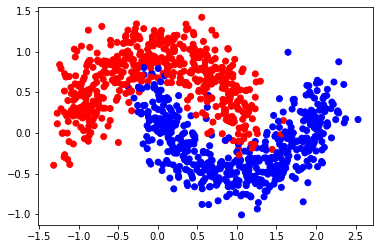

In [13]:
X, y_ = make_moons(1000, noise=.2)
y = y_[:, np.newaxis]
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(*X.T, c=y_, cmap=cm_bright)
plt.show()

## Activation functions
ReLU and sigmoid function and their derivative (should work for any array (1D, 2D,...))

In [14]:
def relu(v):
    return np.maximum(v, 0)


def drelu(v):
    return (v > 0) * 1


def sigmoid(v):
    return 1 / (1 + np.exp(-v))


def dsigmoid(v):
    return sigmoid(v) * (1 - sigmoid(v))

## Defining the neural network
First define the shape of the neural network: the size of input, hidden and output layers

In [15]:
# input layer size
n0 = 2
# hidden layer size
n1 = 50
# output layer size
n2 = 1

Variables for weights, biases of each layers and intermediate
variables to compute the gradient.

In [16]:
# Weights
W1 = np.random.randn(n0, n1)
W2 = np.random.randn(n1, n2)

# Biases
b1 = np.random.randn(n1)
b2 = np.random.randn(n2)

# Partial derivatives w.r.t. activations (equation 2), output wrt previous layer
Xx_1 = np.zeros((n2, n1))
Xx_2 = np.zeros((n2, n2))

# Partial derivatives w.r.t. biases (equation 1)
Xb_1 = np.zeros((n2, n1))
Xb_2 = np.zeros((n2, n2))

# Partial derivatives w.r.t. weigths (equation 1)
Xw_1 = np.zeros((n2, n1, n0))
Xw_2 = np.zeros((n2, n2, n1))

# Partial derivatives of loss w.r.t. weigths and biases (slide 30-31)
Lw_1 = np.zeros((n1, n0))
Lw_2 = np.zeros((n2, n1))
Lb_1 = np.zeros(n1)
Lb_2 = np.zeros(n2)

Define the learning rate and the activation functions along their
derivatives at each layer.

In [17]:
# raise NotImplementedError("Define eta, af1, daf1, af2, daf2")
eta = 0.01
af1 = relu
daf1 = drelu
af2 = sigmoid
daf2 = dsigmoid

## The learning loop

In [25]:
# SGD
nepochs = 5 #(run on all dataset, mini batch by mini batch)
for epoch in range(nepochs + 1):
    for i, (x0, y2) in enumerate(zip(X, y)):

        # Forward pass
        z1 = W1.T @ x0 + b1
        x1 = af1(z1)
        z2 = W2.T @ x1 + b2
        x2 = af2(z2)
        # raise NotImplementedError("Use W1, x0, b1, af1, W2, x1, b2, af2 to define z1, x1, z2, x2")

        if i % 100 == 0:
            print(f"Epoch: {epoch}, sample: {i}, class: {y2}, x2: {x2}")
            
## second layer ##
        # out put is the second layer, so the derivative is 1 and only one neural
        Xx_2 = np.array([[1]])

        # Update partial derivatives w.r.t. weights and biases on second layer
        for i in range(n2):
            for p in range(n2):
                Xb_2[i, p] = Xx_2[i, p] * daf2(z2[p])
                for q in range(n1):
                    Xw_2[i, p, q] = Xx_2[i, p] * daf2(z2[p]) * x1[q]

        # Update partial derivatives w.r.t. activations
        for i in range(n2):
            for p in range(n1):
                Xx_1[i, p] = 0
                for j in range(n2):
                    Xx_1[i, p] += Xx_2[i, j] * daf2(z2[j]) * W2[p, j]
                    
## first layer ##
        # Update partial derivatives w.r.t. weights and biases on first layer
        for i in range(n2):
            for p in range(n1):
                Xb_1[i, p] = Xx_1[i, p] * daf1(z1[p])
                for q in range(n0):
                    Xw_1[i, p, q] = Xx_1[i, p] * daf1(z1[p]) * x0[q]
                    
## loss function (cross entropy loss) ##
        # Compute partial derivatives of the loss w.r.t weights and biases
        for p in range(n1):
            for q in range(n0):
                Lw_1[p, q] = 0
                for i in range(n2):
                    Lw_1[p, q] += (x2[i] - y2[i]) / (x2[i] * (1 - x2[i])) * Xw_1[i, p, q]

        for p in range(n2):
            for q in range(n1):
                Lw_2[p, q] = 0
                for i in range(n2):
                    Lw_2[p, q] += (x2[i] - y2[i]) / (x2[i] * (1 - x2[i])) * Xw_2[i, p, q]

        for p in range(n2):
            Lb_2[p] = 0
            for i in range(n2):
                Lb_2[p] += (x2[i] - y2[i]) / (x2[i] * (1 - x2[i])) * Xb_2[i, p]

        for p in range(n1):
            Lb_1[p] = 0
            for i in range(n2):
                Lb_1[p] += (x2[i] - y2[i]) / (x2[i] * (1 - x2[i])) * Xb_1[i, p]

        # Gradient descent
        W1 -= eta * Lw_1.T
        W2 -= eta * Lw_2.T
        b1 -= eta * Lb_1
        b2 -= eta * Lb_2
        #raise NotImplementedError("Update W1, W2, b1, b2")

Epoch: 0, sample: 0, class: [0], x2: [0.03647494]
Epoch: 0, sample: 100, class: [0], x2: [0.00144789]
Epoch: 0, sample: 200, class: [0], x2: [0.00207556]
Epoch: 0, sample: 300, class: [0], x2: [0.08430006]
Epoch: 0, sample: 400, class: [0], x2: [0.00086257]
Epoch: 0, sample: 500, class: [0], x2: [0.00036322]
Epoch: 0, sample: 600, class: [1], x2: [0.97288109]
Epoch: 0, sample: 700, class: [0], x2: [0.01892458]
Epoch: 0, sample: 800, class: [0], x2: [0.02484675]
Epoch: 0, sample: 900, class: [0], x2: [0.01297205]
Epoch: 1, sample: 0, class: [0], x2: [0.03175457]
Epoch: 1, sample: 100, class: [0], x2: [0.00110495]
Epoch: 1, sample: 200, class: [0], x2: [0.00168794]
Epoch: 1, sample: 300, class: [0], x2: [0.07796082]
Epoch: 1, sample: 400, class: [0], x2: [0.00061237]
Epoch: 1, sample: 500, class: [0], x2: [0.00026936]
Epoch: 1, sample: 600, class: [1], x2: [0.97716333]
Epoch: 1, sample: 700, class: [0], x2: [0.01549681]
Epoch: 1, sample: 800, class: [0], x2: [0.02209876]
Epoch: 1, sample

## Vizualization

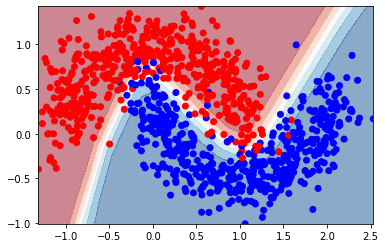

In [26]:
num = 250
x = np.linspace(X[:, 0].min(), X[:, 0].max(), num)
y = np.linspace(X[:, 1].min(), X[:, 1].max(), num)
XX, YY = np.meshgrid(x, y)
points = np.c_[XX.ravel(), YY.ravel()]

z1 = W1.T @ points.T + b1[:, np.newaxis]
x1 = af1(z1)
z2 = W2.T @ x1 + b2[:, np.newaxis]
x2 = af2(z2)

C = x2.reshape(num, num)

plt.contourf(XX, YY, C, cmap=plt.cm.RdBu, alpha=.5)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(*X.T, c=y_, cmap=cm_bright)